In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import datetime as dt
import yfinance as yf
%matplotlib widget


BETA = covariance / variance

In [99]:
start = dt.datetime(2020, 10, 20)

simbol1 = "SPY"
simbol2 = "COF"
ticker1 = yf.Ticker(simbol1)
ticker2 = yf.Ticker(simbol2)
stock_data1 = ticker1.history(start=start, actions=False, rounding=True)
stock_data2 = ticker2.history(start=start, actions=False, rounding=True)

In [100]:
stock_data = pd.concat([stock_data1.Close, stock_data2.Close], axis=1)

In [101]:
stock_data.columns = [simbol1,simbol2]

In [102]:
stock_data

,SPY,COF
Date,,
2020-10-20 00:00:00-04:00,333.56,74.75
2020-10-21 00:00:00-04:00,332.93,71.32
2020-10-22 00:00:00-04:00,334.76,74.25
2020-10-23 00:00:00-04:00,335.89,75.45
2020-10-26 00:00:00-04:00,329.69,72.51
...,...,...
2022-10-14 00:00:00-04:00,357.63,95.39
2022-10-17 00:00:00-04:00,366.82,97.47
2022-10-18 00:00:00-04:00,371.13,99.59


In [103]:
close_data_pct = np.log(stock_data/stock_data.shift())

In [104]:
close_data_pct.head()

,SPY,COF
Date,,
2020-10-20 00:00:00-04:00,NaN,NaN
2020-10-21 00:00:00-04:00,-0.001891,-0.046972
2020-10-22 00:00:00-04:00,0.005482,0.040261
2020-10-23 00:00:00-04:00,0.003370,0.016032
2020-10-26 00:00:00-04:00,-0.018631,-0.039746


In [105]:
covariance = close_data_pct.cov().iloc[0,1]
covariance

0.00017296541788000422

In [106]:
variance = close_data_pct["SPY"].var()
variance

0.0001391978591693979

In [107]:
BETA = covariance/variance
BETA

1.242586767584641

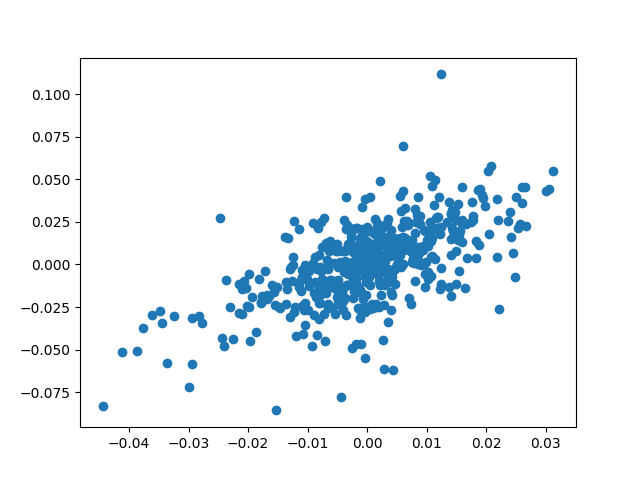

In [109]:
fig1, ax1 = plt.subplots()
ax1.scatter(close_data_pct.SPY, close_data_pct.COF);

Linear regression:

In [118]:
X = close_data_pct['SPY'].iloc[1:].values.reshape(-1,1)
Y = close_data_pct['COF'].iloc[1:].values.reshape(-1,1)

regression = linear_model.LinearRegression()
regression.fit(X,Y)
regression.coef_
# regression coeficient value is the same as beta value

array([[1.24258677]])